<a href="https://colab.research.google.com/github/st3082group10/Abalone_Age_Prediction/blob/main/Abalone_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import mean_squared_err

# Load the Abalone Dataset
abalone = pd.read_csv('G:/University of Colombo/3rd Year/2nd Semester/ST 3082/Project 2/abalone.csv')

# Remove rows where height is equal to 0 and greater than 1
abalone = abalone[(abalone['Height'] > 0) & (abalone['Height'] < 1)]

# Perform one-hot encoding on the "sex" variable
abalone = pd.get_dummies(abalone, columns=['Sex'], prefix=['Sex'])


# Dropping one dummy column to avoid multicollinearity ( Sex_I would then be the base category)
abalone.drop('Sex_I', axis=1, inplace=True)

print(abalone.head())

   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_F  Sex_M  
0         0.150     15      0      1  
1         0.070      7      0      1  
2         0.210      9      1      0  
3         0.155     10      0      1  
4         0.055      7      0      0  


In [ ]:
# Separate features and target variable
X = abalone.drop(["Rings"], axis=1)
y = abalone["Rings"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) 



In [ ]:
import statsmodels.api as sm

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     441.8
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:46:36   Log-Likelihood:                -7373.2
No. Observations:                3339   AIC:                         1.477e+04
Df Residuals:                    3329   BIC:                         1.483e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7028      0.302      8.

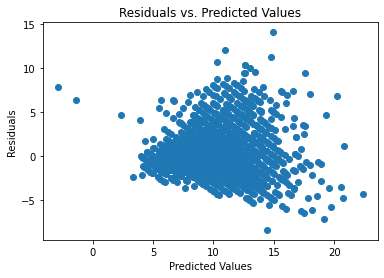

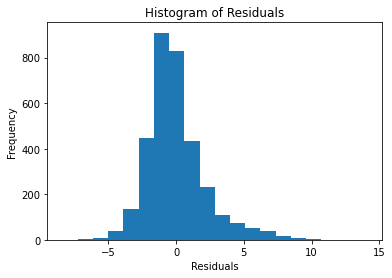

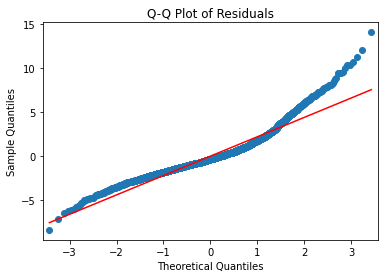

In [ ]:
# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
print(model.summary())

# Check assumptions using diagnostic plots
residuals = model.resid

# Plotting the residuals vs. predicted values
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Plotting the histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Plotting a Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("RMSE of test data:", np.sqrt(mse))

# MSE of training data
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("RMSE of training data:", np.sqrt(mse_train))

# Calculate the MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAPE: {mape:.2f}%")


RMSE of test data: 2.093272153687245
RMSE of training data: 2.201808520976331
MAPE: 15.71%


#### Removing length variable as it is not significant and refitting the model

In [ ]:
X_train = X_train.drop("Length", axis = 1)
X_test = X_test.drop("Length", axis = 1)

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     497.2
Date:                Sat, 29 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:46:52   Log-Likelihood:                -7373.2
No. Observations:                3339   AIC:                         1.476e+04
Df Residuals:                    3330   BIC:                         1.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7047      0.281      9.

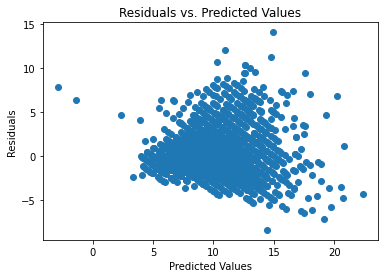

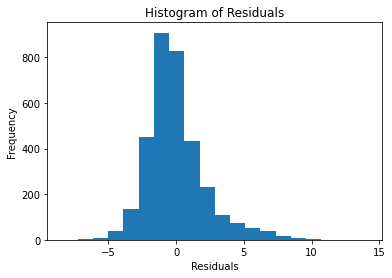

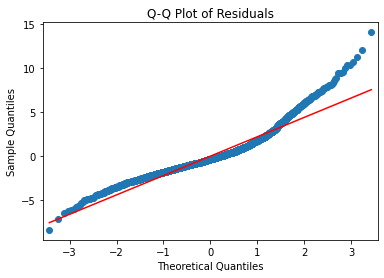

          Feature   VIF Score
0           const   54.321798
1        Diameter    9.315306
2          Height    6.557886
3    Whole weight  106.858783
4  Shucked weight   27.645735
5  Viscera weight   17.148100
6    Shell weight   21.409412
7           Sex_F    1.999089
8           Sex_M    1.877439


RMSE of test data: 2.0932466454637395
RMSE of training data: 2.201808616870876
MAPE: 15.71%


In [ ]:
# Fit the multiple linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression model
print(model.summary())

# Check assumptions using diagnostic plots
residuals = model.resid

# Plotting the residuals vs. predicted values
plt.scatter(model.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Plotting the histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Plotting a Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF scores
vif = pd.DataFrame()
vif["Feature"] = X_train.columns
vif["VIF Score"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Print the VIF scores
print(vif)
print("\n")

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("RMSE of test data:", np.sqrt(mse))

# MSE of training data
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print("RMSE of training data:", np.sqrt(mse_train))

# Calculate the MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAPE: {mape:.2f}%")

In [ ]:
y_pred_round = y_pred.round()

# Evaluate the model for rounded data
mse = mean_squared_error(y_test, y_pred_round)
print("RMSE of test data - rounded:", np.sqrt(mse))

# Calculate the MAPE
mape = np.mean(np.abs((y_test - y_pred_round) / y_test)) * 100

print(f"MAPE: {mape:.2f}%")
print("Accuracy:", 100 - mape, "%")

# MSE of training data
mse_train = mean_squared_error(y_train, y_pred_train.round())
print("RMSE of training data:", np.sqrt(mse_train))

# Calculate the MAPE
mape_train = np.mean(np.abs((y_train - y_pred_train.round()) / y_train)) * 100
print('MAPE of training data:', mape_train, '%')

RMSE of test data - rounded: 2.097903144759171
MAPE: 15.33%
Accuracy: 84.67207285359 %
RMSE of training data: 2.2271433979168687
MAPE of training data: 15.781076246342323 %


C:\Users\sanjani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


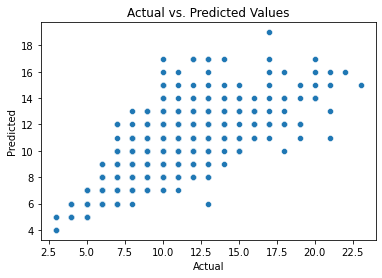

In [ ]:
import seaborn as sns
# Plotting the actual vs. predicted values
sns.scatterplot(y_test,y_pred_round)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
correlation = np.corrcoef(y_test,y_pred_round)[0, 1]
print(correlation)

0.7302789281385969
